In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tenpy.models.spins import SpinChain
from tenpy.algorithms import dmrg, tebd
from tenpy.networks.mps import MPS, MPSEnvironment

import logging
logging.basicConfig(level=logging.INFO)

ModuleNotFoundError: No module named 'tenpy'

In [58]:
L = 11
J = 1.
K = 0.25
g = 0.50
h = 0.25

model_params = {
    'L': L,
    'Jx': -4 * J,
    'Jy': 0.,
    'Jz': -4 * K,
    'hx': h,
    'hz': g
}
model = SpinChain(model_params)

INFO:tenpy.models.model.Model:SpinChain: set conserve to None
INFO:tenpy.tools.params:SpinChain: reading 'L'=11
INFO:tenpy.tools.params:SpinChain: reading 'Jx'=-4.0
INFO:tenpy.tools.params:SpinChain: reading 'Jy'=0.0
INFO:tenpy.tools.params:SpinChain: reading 'Jz'=-1.0
INFO:tenpy.tools.params:SpinChain: reading 'hx'=0.25
INFO:tenpy.tools.params:SpinChain: reading 'hz'=0.5


In [59]:
for key in model.coupling_terms:
    print('\n' + key)
    print(model.coupling_terms[key].to_TermList())

for key in model.onsite_terms:
    print('\n' + key)
    print(model.onsite_terms[key].to_TermList())


Sp_i Sm_j
-1.00000 * Sm_0 Sp_1 +
-1.00000 * Sp_0 Sm_1 +
-1.00000 * Sm_1 Sp_2 +
-1.00000 * Sp_1 Sm_2 +
-1.00000 * Sm_2 Sp_3 +
-1.00000 * Sp_2 Sm_3 +
-1.00000 * Sm_3 Sp_4 +
-1.00000 * Sp_3 Sm_4 +
-1.00000 * Sm_4 Sp_5 +
-1.00000 * Sp_4 Sm_5 +
-1.00000 * Sm_5 Sp_6 +
-1.00000 * Sp_5 Sm_6 +
-1.00000 * Sm_6 Sp_7 +
-1.00000 * Sp_6 Sm_7 +
-1.00000 * Sm_7 Sp_8 +
-1.00000 * Sp_7 Sm_8 +
-1.00000 * Sm_8 Sp_9 +
-1.00000 * Sp_8 Sm_9 +
-1.00000 * Sm_9 Sp_10 +
-1.00000 * Sp_9 Sm_10

Sp_i Sp_j
-1.00000 * Sm_0 Sm_1 +
-1.00000 * Sp_0 Sp_1 +
-1.00000 * Sm_1 Sm_2 +
-1.00000 * Sp_1 Sp_2 +
-1.00000 * Sm_2 Sm_3 +
-1.00000 * Sp_2 Sp_3 +
-1.00000 * Sm_3 Sm_4 +
-1.00000 * Sp_3 Sp_4 +
-1.00000 * Sm_4 Sm_5 +
-1.00000 * Sp_4 Sp_5 +
-1.00000 * Sm_5 Sm_6 +
-1.00000 * Sp_5 Sp_6 +
-1.00000 * Sm_6 Sm_7 +
-1.00000 * Sp_6 Sp_7 +
-1.00000 * Sm_7 Sm_8 +
-1.00000 * Sp_7 Sp_8 +
-1.00000 * Sm_8 Sm_9 +
-1.00000 * Sp_8 Sp_9 +
-1.00000 * Sm_9 Sm_10 +
-1.00000 * Sp_9 Sp_10

Sz_i Sz_j
-1.00000 * Sz_0 Sz_1 +
-1.00000 * Sz_1 Sz_2 +
-

In [60]:
chi_max = 30

psi = MPS.from_lat_product_state(model.lat, [['up']])
dmrg_params = {
    'mixer': True,
    'max_E_err': 1.e-10,
    'trunc_params': {
        'chi_max': chi_max,
        'svd_min': 1.e-10,
    },
    'combine': True
}
eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
E, psi = eng.run()

INFO:tenpy.tools.params:TwoSiteDMRGEngine: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO:tenpy.tools.params:TwoSiteDMRGEngine: reading 'combine'=True
INFO:tenpy.tools.params:TwoSiteDMRGEngine: reading 'mixer'=True
INFO:tenpy.algorithms.mps_common:activate DensityMatrixMixer with initial amplitude 1e-05
INFO:tenpy.algorithms.dmrg:Running sweep with optimization
INFO:tenpy.tools.params:trunc_params: reading 'chi_max'=30
INFO:tenpy.tools.params:trunc_params: reading 'svd_min'=1e-10
INFO:tenpy.algorithms.dmrg:checkpoint after sweep 1
energy=-11.8102058333935727, max S=0.3785167400780234, age=11, norm_err=3.3e-01
Current memory usage 401.1MB, wall time: 0.5s
Delta E = nan, Delta S = 6.6699e-02 (per sweep)
max trunc_err = 2.2494e-19, max E_trunc = 1.4211e-14
chi: [2, 4, 8, 15, 20, 18, 16, 8, 4, 2]
INFO:tenpy.algorithms.dmrg:Running sweep with optimization
INFO:tenpy.algorithms.dmrg:checkpoint after sweep 2
energy=-11.8102058333935709, max S=0.0692636169330402, age=11, nor

In [85]:
psi_0 = psi.copy()
psi_t = psi.copy()
psi_t.apply_local_op(L//2, 'Sz', unitary=False)

dt = 5e-2
N = 100
t = N * dt

tebd_params = {
    'N_steps': 1,
    'dt': dt,
    'order': 4,
    'trunc_params': {
        'chi_max': chi_max,
        'svd_min': 1.e-12
    }
}
eng = tebd.TEBDEngine(psi_t, model, tebd_params)

INFO:tenpy.tools.params:TEBDEngine: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')


In [86]:
C_t = [4 * MPSEnvironment(psi_0, psi_t).expectation_value('Sz')]
for n in range(N):
    eng.run()
    phase = np.exp(1j * E * eng.evolved_time)
    C_i = phase * 4 * MPSEnvironment(psi_0, psi_t).expectation_value('Sz')
    C_t.append(C_i)
C_t = np.array(C_t)

INFO:tenpy.tools.params:TEBDEngine: reading 'dt'=0.05
INFO:tenpy.tools.params:TEBDEngine: reading 'N_steps'=1
INFO:tenpy.tools.params:TEBDEngine: reading 'order'=4
INFO:tenpy.algorithms.tebd:Calculate U for {'order': 4, 'delta_t': 0.05, 'type_evo': 'real', 'E_offset': None, 'tau': 0.05}
INFO:tenpy.tools.params:trunc_params: reading 'chi_max'=30
INFO:tenpy.tools.params:trunc_params: reading 'svd_min'=1e-12
INFO:tenpy.algorithms.algorithm:--> time=0.050, max(chi)=28, max(S)=0.06925, avg DeltaS=3.6155e-04, since last update: 0.3s
INFO:tenpy.algorithms.algorithm:--> time=0.100, max(chi)=29, max(S)=0.06925, avg DeltaS=1.0784e-03, since last update: 0.2s
INFO:tenpy.algorithms.algorithm:--> time=0.150, max(chi)=30, max(S)=0.06925, avg DeltaS=1.7783e-03, since last update: 0.2s
INFO:tenpy.algorithms.algorithm:--> time=0.200, max(chi)=30, max(S)=0.06925, avg DeltaS=2.4536e-03, since last update: 0.3s
INFO:tenpy.algorithms.algorithm:--> time=0.250, max(chi)=30, max(S)=0.06925, avg DeltaS=3.0983e

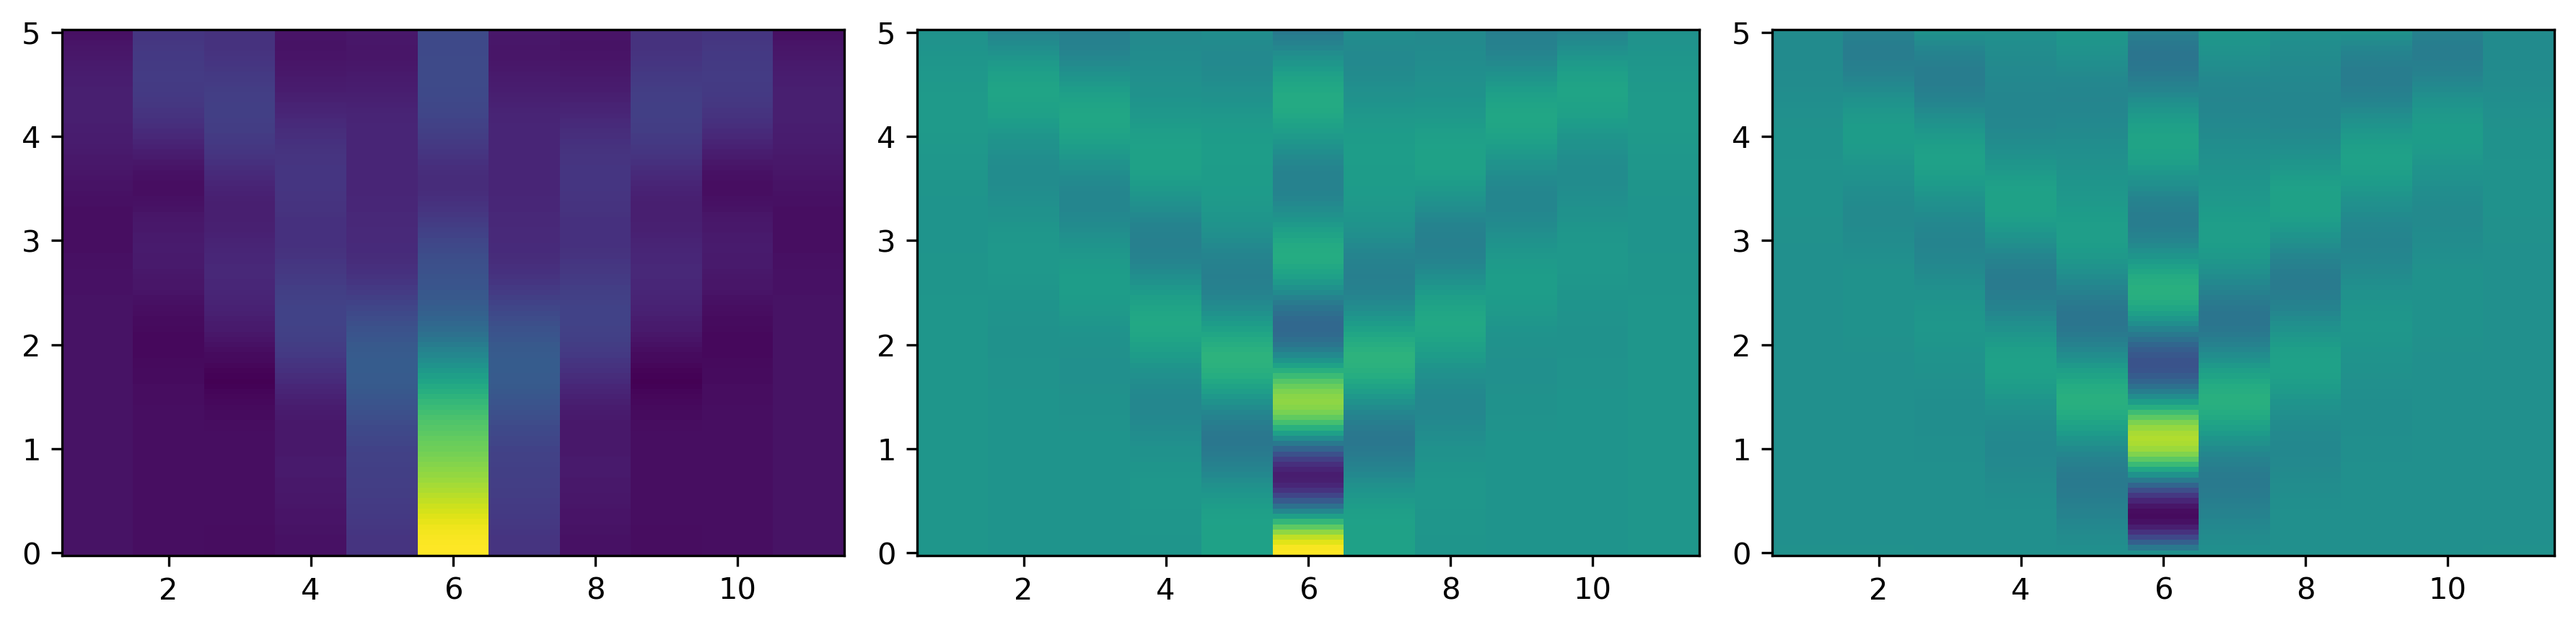

In [87]:
xs = np.arange(L+1) + 0.5
ys = (np.arange(N+2) - 0.5) * dt

fig, axs = plt.subplots(ncols=3, figsize=(12,3), dpi=300)

axs[0].pcolormesh(xs, ys, np.abs(C_t), vmin=0., vmax=1.)
axs[1].pcolormesh(xs, ys, np.real(C_t), vmin=-1., vmax=1.)
axs[2].pcolormesh(xs, ys, np.imag(C_t), vmin=-1., vmax=1.)

plt.tight_layout()
plt.show()